# Spanish Wine Quality Dataset

 ### Model wine quality based on reviews and description

#### Context
This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points).

#### Content
The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. 


In [62]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz
 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

%matplotlib inline

pd.set_option('display.max_columns', None)

#### Loading and cleaning the data

In [2]:
wine= pd.read_csv("wines_SPA.csv", na_values= ["NA", "N.V."])

In [3]:
wine.dropna(inplace= True)
wine.describe()

,year,rating,num_reviews,price,body,acidity
count,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000
mean,2012.955189,4.260115,440.065404,67.397695,4.163756,2.947117
std,7.145244,0.125122,605.072165,165.514976,0.593981,0.242883
min,1910.000000,4.200000,25.000000,6.260000,2.000000,1.000000
25%,2011.000000,4.200000,388.000000,19.980000,4.000000,3.000000
50%,2015.000000,4.200000,402.000000,31.630000,4.000000,3.000000
75%,2017.000000,4.300000,417.000000,61.940000,5.000000,3.000000
max,2021.000000,4.900000,16505.000000,3119.080000,5.000000,3.000000


In [4]:
wine['year'] = wine['year'].astype(int)


In [5]:
wine= wine.drop(columns=['country'])

In [6]:
wine.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


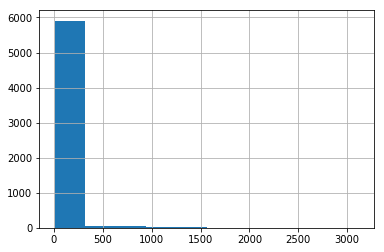

In [7]:
wine["price"].hist()

In [8]:
filterPrice=  wine["price"] <200
winePrice = wine[filterPrice]

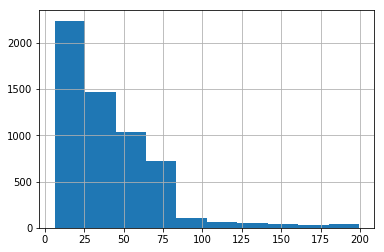

In [9]:
winePrice["price"].hist()

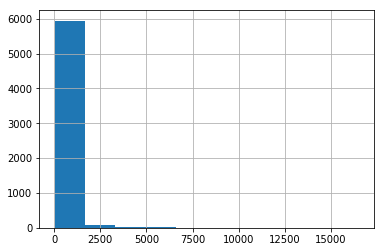

In [10]:
 wine["num_reviews"].hist()

In [11]:
filterRevi=  wine["num_reviews"] <200
wineRevi = wine[filterRevi]

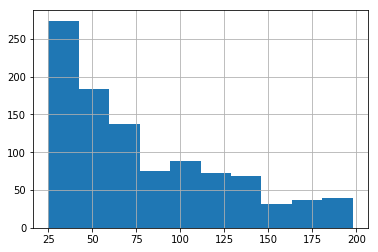

In [12]:
wineRevi["num_reviews"].hist()

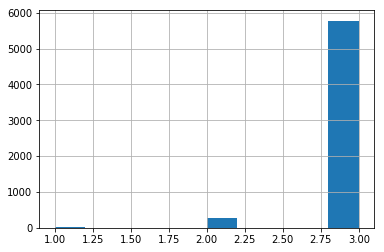

In [13]:
 wine["acidity"].hist()

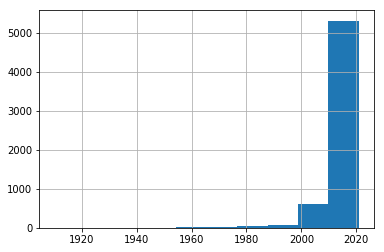

In [14]:
wine['year'].hist()

In [15]:
filterYear=  wine["year"] >= 2000
wineYear = wine[filterYear]

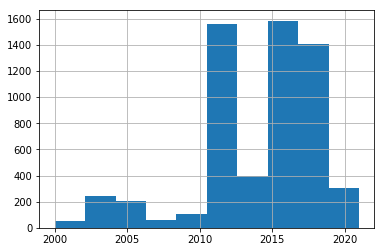

In [16]:
wineYear['year'].hist()

Text(0.5,1,'Wine reviews by year')

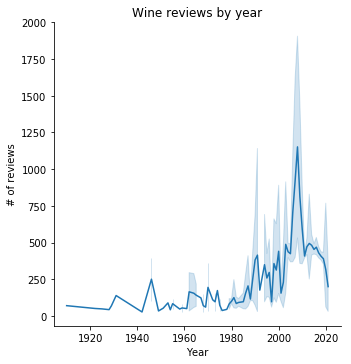

In [17]:
sns.relplot(x = "year", y = "num_reviews", kind = "line", data = wine)
plt.xlabel("Year")
plt.ylabel("# of reviews")
plt.title("Wine reviews by year")

Text(0.5,1,'Wine price by rating')

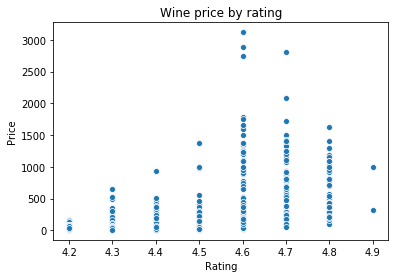

In [18]:
sns.scatterplot(x = "rating", y = "price", data = wine)
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Wine price by rating")

### Decision tree regression

In [19]:
x = wine[['rating',"num_reviews", "body", "acidity", "year"]]
y = wine['price']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [21]:
tree= DecisionTreeRegressor(max_depth = 3)
tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
train_prediction= tree.predict(x_train)
test_prediction= tree.predict(x_test)

In [23]:
mean_squared_error(train_prediction,y_train)

14763.591257563277

In [24]:
mean_squared_error(test_prediction,y_test)

11587.842501066929

The two mean squared errors are very close together (for their magnitudes) so this does not suggest overfitting is happening. However, we cannot tell if underfitting is happening.

In [25]:
tree2 = DecisionTreeRegressor(max_depth = 5)
tree2.fit(x_train,y_train)
train_prediction2 = tree2.predict(x_train)
test_prediction2 = tree2.predict(x_test)
mean_squared_error(train_prediction2,y_train)

10309.443970234639

In [26]:
mean_squared_error(test_prediction2,y_test)

13646.596525292498

In [27]:
tree3 = DecisionTreeRegressor(max_depth = 8)
tree3.fit(x_train,y_train)
train_prediction3 = tree3.predict(x_train)
test_prediction3 = tree3.predict(x_test)
mean_squared_error(train_prediction3,y_train)

4662.277579534522

In [28]:
mean_squared_error(test_prediction3, y_test)

19448.269829471486

#####  The code below was used to extract the first tree we made. In order to be able to graph it.

dot_data = export_graphviz(tree2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine2.dot")

with open ("wine.dot", "r") as fin:
    with open("wine_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]",'rating')
            line = line.replace("X[1]","num_reviews")
            line = line.replace("X[2]","body")
            line = line.replace("X[3]","acidity")
            line = line.replace("X[4]","year")
            fout.write(line)

In [29]:
wine.dtypes

winery          object
wine            object
year             int64
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

#### K-Nearest Neighbors Regression

In [30]:
wine2= pd.get_dummies(wine, columns= ['winery', 'wine','region','type'], drop_first=True)

In [31]:
Y = wine2["price"]

In [32]:
X= wine2.drop(columns= ["price"])

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2)

In [34]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [35]:
Y_test_pred = knn.predict(X_test)
Y_train_pred = knn.predict(X_train)

In [36]:
mean_squared_error(Y_test_pred, Y_test)

28522.52066460719

In [37]:
mean_squared_error(Y_train_pred, Y_train)

13138.747134730093

#### The training is lower than testing which can indicate overdrifting. 

In [38]:
knn2 = KNeighborsRegressor(n_neighbors = 7)
knn2.fit(X_train, Y_train)
Y_test_pred2 = knn2.predict(X_test)
Y_train_pred2 = knn2.predict(X_train)
mean_squared_error(Y_test_pred2, Y_test)

30046.342826849836

In [39]:
mean_squared_error(Y_train_pred2, Y_train)

14725.76392639776

In [40]:
knn3 = KNeighborsRegressor(n_neighbors = 15)
knn3.fit(X_train, Y_train)
Y_test_pred3 = knn3.predict(X_test)
Y_train_pred3 = knn3.predict(X_train)
mean_squared_error(Y_test_pred3, Y_test)

29217.830291138307

In [41]:
mean_squared_error(Y_train_pred3, Y_train)

16838.095084890214

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

/usr/local/lib/python3.4/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.4/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
knn_scaled = KNeighborsRegressor(n_neighbors = 15)
knn_scaled.fit(X_train_scaled, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [44]:
Y_pred_train_scaled = knn_scaled.predict(X_train_scaled)
Y_pred_test_scaled = knn_scaled.predict(X_test_scaled)

In [45]:
mean_squared_error(Y_pred_test_scaled,Y_test)

15667.657032203782

In [46]:
mean_squared_error(Y_pred_train_scaled,Y_train)

7637.673755721598

#### K-mean clustering

In [81]:
z= wine[['rating',"num_reviews", "body", "acidity", "year"]]
z.dtypes

rating         float64
num_reviews      int64
body           float64
acidity        float64
year             int64
dtype: object

In [82]:
kmeans= KMeans(n_clusters= 3)

In [83]:
kmeans.fit(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [84]:
clusters= kmeans.predict(z)

In [85]:
clusters

array([0, 0, 2, ..., 0, 0, 0], dtype=int32)

In [86]:
wine["clusters"] = clusters

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

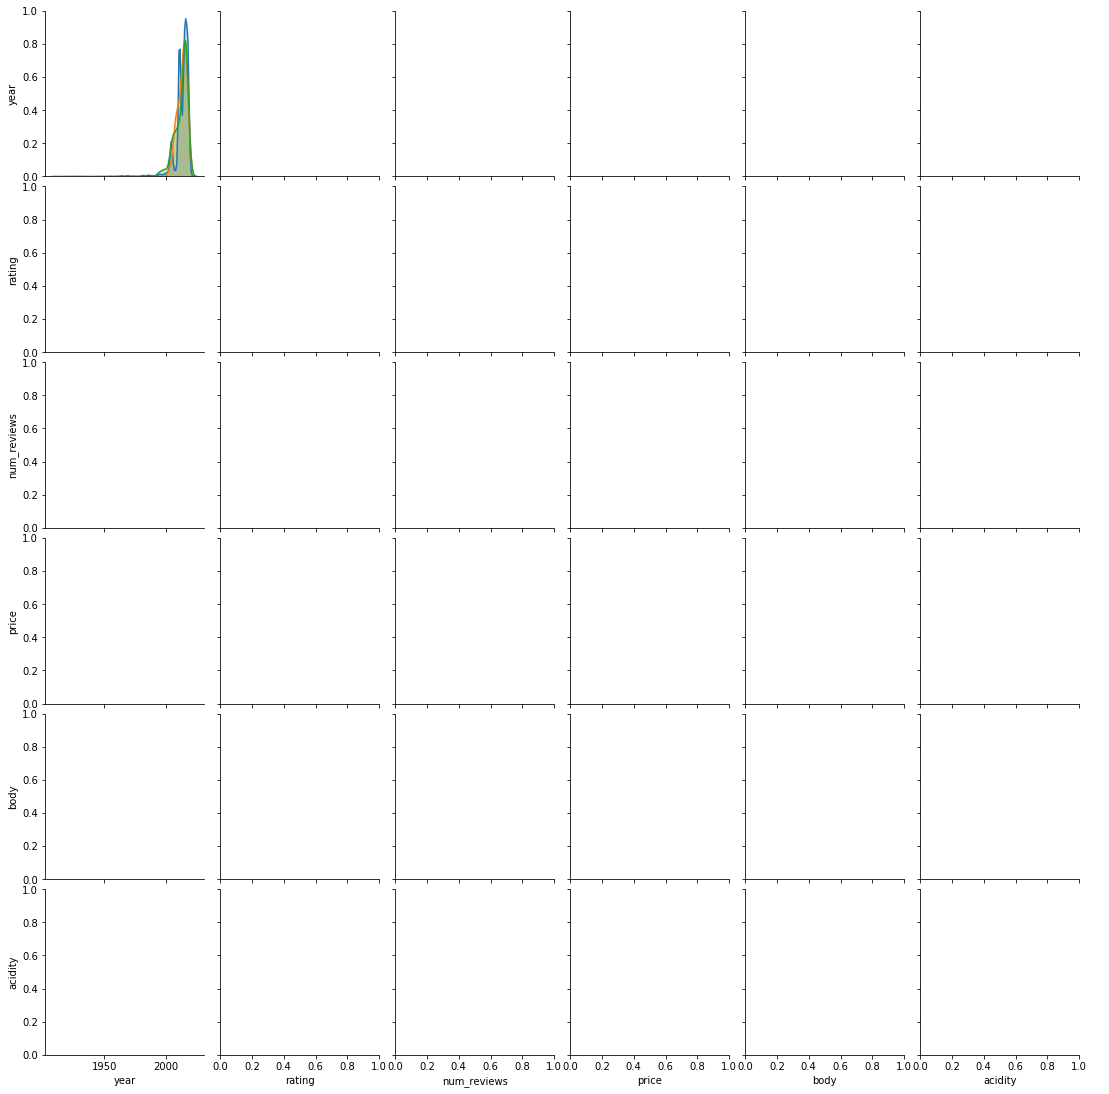

In [111]:
sns.pairplot(wine, hue="clusters")

Text(0.5,1,'Wine rating by acidity')

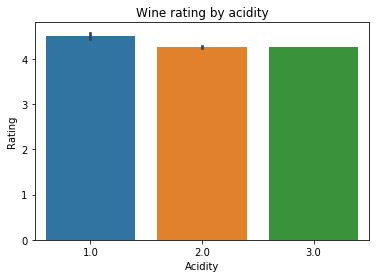

In [112]:
sns.barplot(x = "acidity", y = "rating", data = wine)
plt.xlabel("Acidity")
plt.ylabel("Rating")
plt.title("Wine rating by acidity")